## Import 

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

import matplotlib.pyplot as plt

## Reading Data

In [3]:
#need to update with data augmentation
train_image_generator = ImageDataGenerator(
  rescale = 1.0/255)
test_image_generator = ImageDataGenerator(
  rescale = 1.0/255)

In [4]:
training_iterator = train_image_generator.flow_from_directory('/kaggle/input/covid19-image-dataset/Covid19-dataset/train',
target_size = (300, 300),
batch_size = 16,
color_mode = 'grayscale')
#class_mode = 'sparse')

Found 251 images belonging to 3 classes.


In [5]:
test_iterator = test_image_generator.flow_from_directory('/kaggle/input/covid19-image-dataset/Covid19-dataset/test',
target_size = (300, 300),
batch_size = 16,
color_mode = 'grayscale')
#class_mode = 'sparse')

Found 66 images belonging to 3 classes.


## Model

In [6]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)

model = Sequential()
model.add(layers.Input(shape = training_iterator.image_shape))
model.add(layers.Conv2D(16, 3, padding ='same', activation = 'relu'))
#model.add(layers.Dropout(0.1))
model.add(layers.MaxPooling2D())
#model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(32, 3, padding = 'same', activation = 'relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
#model.add(layers.Dense(128,activation = 'relu'))
model.add(layers.Dense(3, activation = 'softmax'))

model.compile(
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005),
loss = tf.keras.losses.CategoricalCrossentropy(),
metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 180000)            0         
_________________________________________________________________
dense (Dense)                (None, 3)                 540003    
Total params: 544,803
Trainable params: 544,803
Non-trainable params: 0
__________________________________________________

## Train

In [7]:
batch_size = 16
history = model.fit(training_iterator, epochs = 10,  validation_data=test_iterator)

Epoch 1/10
16/16 [==============================] - 17s 1s/step - loss: 3.3290 - accuracy: 0.5976 - val_loss: 0.4596 - val_accuracy: 0.8788
Epoch 2/10
16/16 [==============================] - 12s 732ms/step - loss: 0.2483 - accuracy: 0.9283 - val_loss: 0.3020 - val_accuracy: 0.8636
Epoch 3/10
16/16 [==============================] - 11s 691ms/step - loss: 0.0839 - accuracy: 0.9801 - val_loss: 0.2726 - val_accuracy: 0.8788
Epoch 4/10
16/16 [==============================] - 11s 701ms/step - loss: 0.0898 - accuracy: 0.9641 - val_loss: 0.6737 - val_accuracy: 0.8182
Epoch 5/10
16/16 [==============================] - 12s 723ms/step - loss: 0.0221 - accuracy: 0.9920 - val_loss: 0.3277 - val_accuracy: 0.8939
Epoch 6/10
16/16 [==============================] - 12s 724ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.4218 - val_accuracy: 0.8788
Epoch 7/10
16/16 [==============================] - 11s 710ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.3152 - val_accuracy: 0.8788
Ep

## Visualize Results

X_ray0
	Model prediction: [2.4117375e-10 4.4982997e-01 5.5017000e-01]
	True label: Normal (1)
	Correct: False


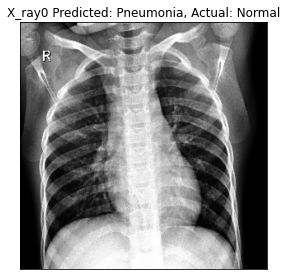

X_ray1
	Model prediction: [2.2958634e-08 9.9540365e-01 4.5963544e-03]
	True label: Normal (1)
	Correct: True


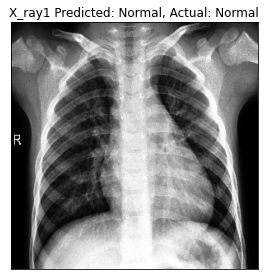

X_ray2
	Model prediction: [9.9955362e-01 1.2156515e-07 4.4622127e-04]
	True label: Pneumonia (2)
	Correct: False


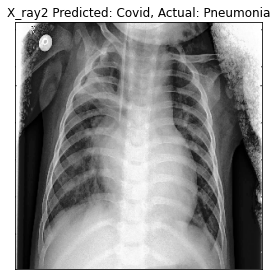

X_ray3
	Model prediction: [2.9168848e-05 1.0431128e-01 8.9565957e-01]
	True label: Normal (1)
	Correct: False


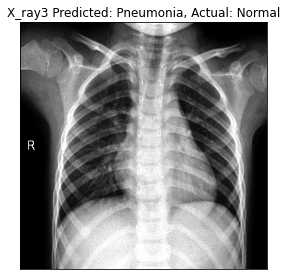

X_ray4
	Model prediction: [9.8622155e-01 1.2892719e-02 8.8577025e-04]
	True label: Covid (0)
	Correct: True


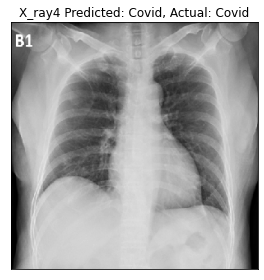

<Figure size 432x288 with 0 Axes>

In [8]:
from tensorflow import argmax
from tensorflow import expand_dims
from matplotlib import pyplot as plt


#Take matplotlib frame and remove axes.
def clean_plot(plot):
    plot.axes.get_xaxis().set_visible(False)
    plot.axes.get_yaxis().set_visible(False)

#Dict mapping from class numbers to string labels:
class_names = {
        0: "Covid",
        1: "Normal",
        2: "Pneumonia"
    }

#Loads a sample batch of data
sample_batch_input, sample_labels = test_iterator.next()
    
#Grabs the first five images
sample_batch_input = sample_batch_input[:5]
sample_labels = sample_labels[:5]

#Makes predictions using model.predict(x)
sample_predictions = model.predict(sample_batch_input)

#Iterate of images, predictions, and true labels
for i, (image, prediction, label) in enumerate(zip(sample_batch_input, sample_predictions, sample_labels)):

    image_name = "X_ray{}".format(i)

    #Gets predicted class with highest probability
    predicted_class = argmax(prediction).numpy()

    #Gets correct label
    actual_class = argmax(label).numpy()

    print(image_name)
    print("\tModel prediction: {}".format(prediction))
    print("\tTrue label: {} ({})".format(class_names[actual_class], actual_class))
    print("\tCorrect:", predicted_class == actual_class)

    #Saves image file using matplotlib
    sample_image = image
    clean_plot(plt.imshow(
    sample_image[:, :, 0],
    cmap = "gray"
        ))
    plt.title(image_name + " Predicted: {}, Actual: {}".format(class_names[predicted_class], class_names[actual_class]))
    plt.tight_layout()
    plt.show()
    plt.clf()